In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import hypertools as hyp
import pylab
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 9.7 MB/s 


**EDA АНАЛИЗ**

In [ ]:
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Посмотрим на распределения по каждому числовому признаку

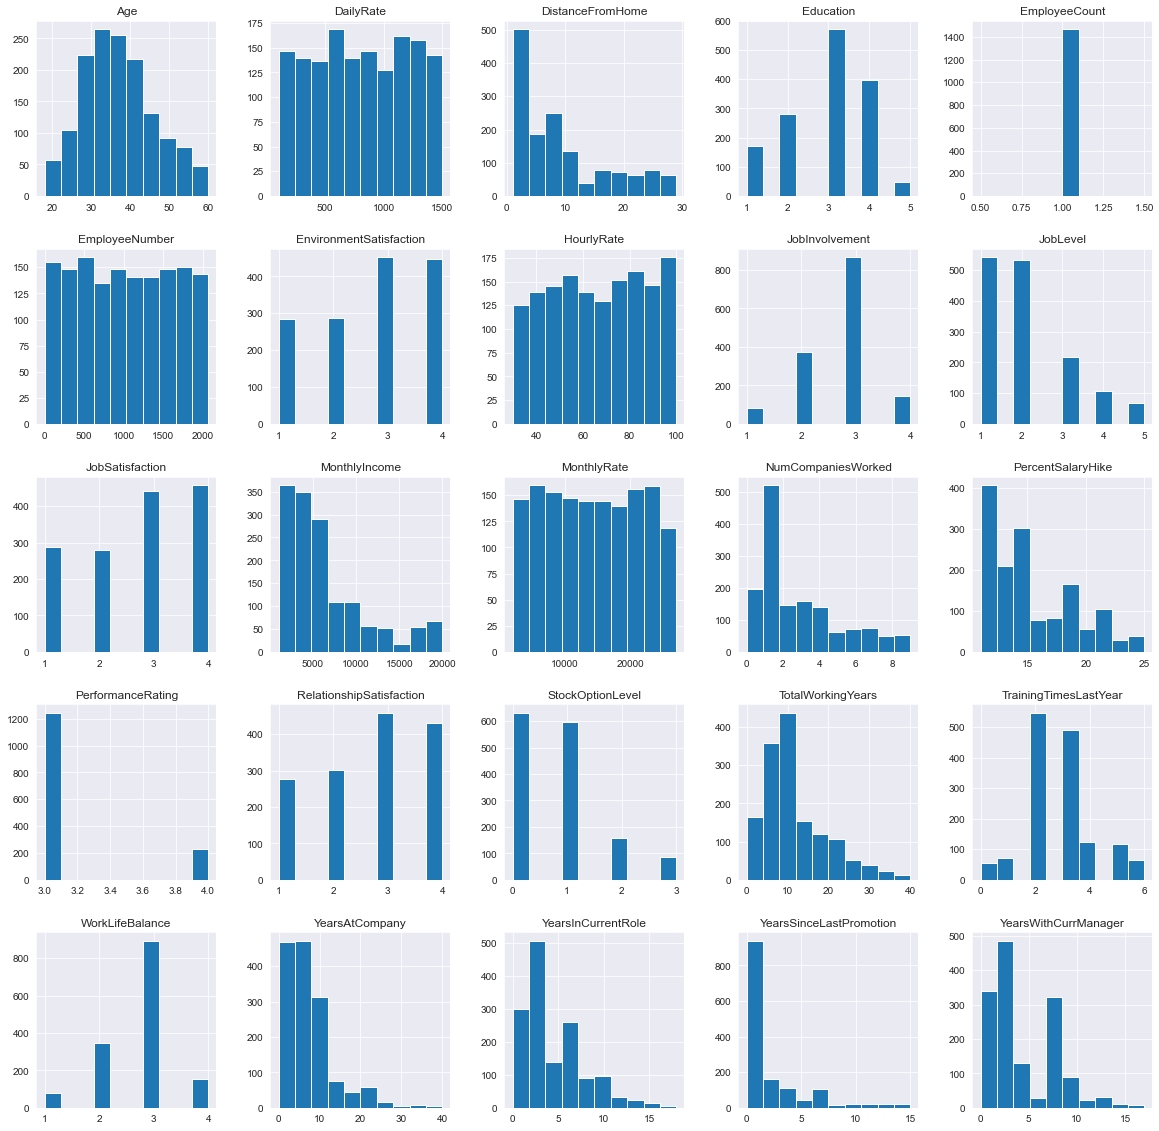

In [ ]:
df.hist(figsize=(20,20))
plt.show()

#### Выводы:
* Распределение "Age" можно представить как нормальное распределение. Правда оно немного искажено как вправо, так и влево. 
* EmployeeCount и StandardHours являются избыточными столбцами, так как для всех сотрудников значения одинаковые.
* Многие столбцы смещены и вправо, и влево. Следовательно, понадобится нормализация данных.

### Коррреляция

In [ ]:
df_transf = df.copy()
df_transf["Attrition"] = df_transf["Attrition"].apply(
    lambda x: 0 if x == 'No' else 1)

df_transf = df_transf.drop(["EmployeeCount", "StandardHours", 
                            "EmployeeNumber", "Over18"], axis=1)

correlations = df_transf.corr()["Attrition"].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Attrition             1.000000
Name: Attrition, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Attrition, dtype: float64


<AxesSubplot:>

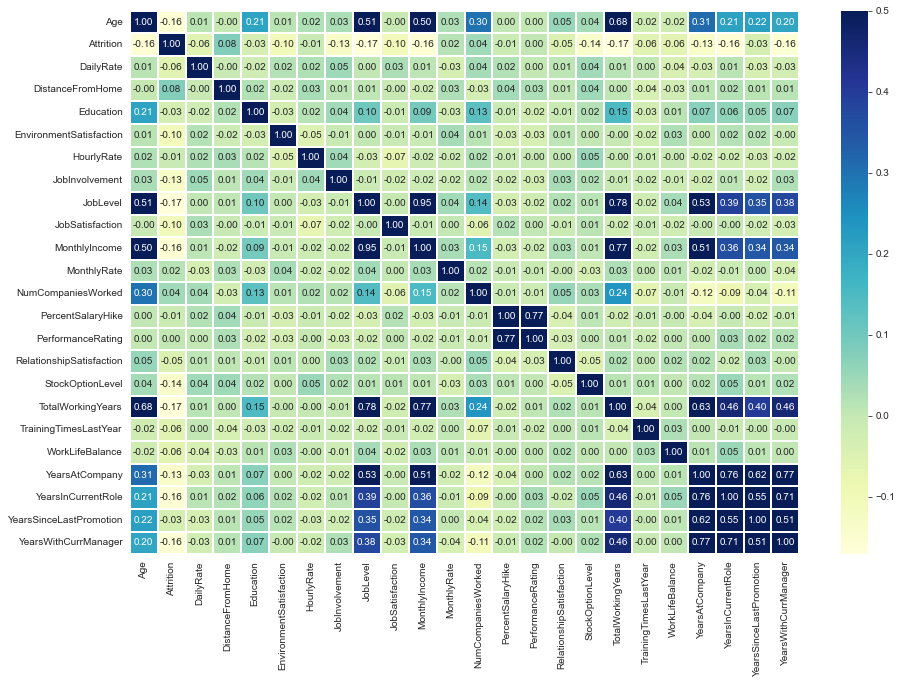

In [ ]:
corilation_matrix = df_transf.corr()
mask = np.zeros_like(corilation_matrix)
mask[np.triu_indices_from(mask)] = True

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corilation_matrix, vmax=.5,
            annot=True, fmt=".2f",
            linewidths=.2, cmap="YlGnBu")

Из корреляционной матрицы можно заметить:

* Признаки "MonthlyRate", "NumCompaniesWorked" и "DistanceFromHome" положительно коррелируют с выбытием;
* Признаки "Age", "TotalWorkingYears", "MonthlyIncome", "JobLevel" и "YearsInCurrentRole" отрицательно коррелируют с выбытием.

### Посмотрим на выбросы

C:\Users\isaev\AppData\Local\Temp\ipykernel_2680\575862219.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyp.plot(df.drop('Attrition', 1), normalize='across', reduce='PCA', ndims=2, fmt='o')


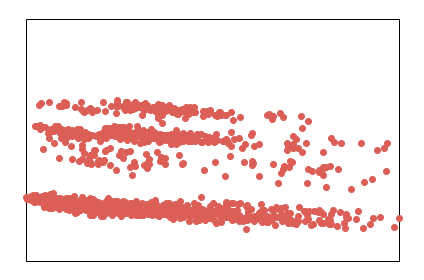

In [ ]:
hyp.plot(df.drop('Attrition', 1), normalize='across', reduce='PCA', ndims=2, fmt='o')

Можно заметить, что значения в признаках довольно размашистые. Поэтому, для улучшения качества работы модели, нужно будет провести шкалирование данных

### Заострим внимание на ключевых признаках

In [ ]:
attrited_df = df[df["Attrition"] == "Yes"]
attrited_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


### 1) Gender

In [ ]:
# Gender of employees
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

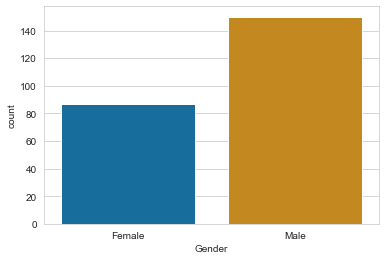

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=attrited_df,palette='colorblind')

plt.show()

Большинство ушедших - мужской пол

### 2) Education

Посмотрим на процентное соотношение выпускников для каждой области образования

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

Большинство уволившихся имели высокий уровень образования

### 3) Department

In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

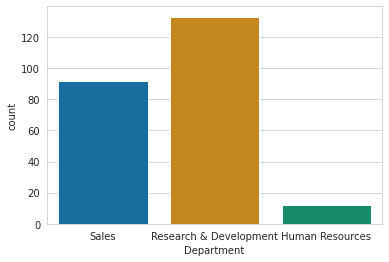

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Department',data=attrited_df,palette='colorblind')

plt.show()

Большинство людей уходило из research & Development Department

### 4) Age

In [ ]:
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df.loc[df['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = nan years old and standard deviation = nan
Current exmployees: average age = nan years old and standard deviation = nan


C:\Users\isaev\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:366: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\isaev\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:371: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


Давайте создадим график оценки плотности ядра (KDE), окрашенный значением целевого объекта. Оценка плотности ядра (KDE) - это непараметрический способ оценки функции плотности вероятности случайной величины. Это позволит нам определить, существует ли корреляция между возрастом Клиента и его способностью вернуть долг.

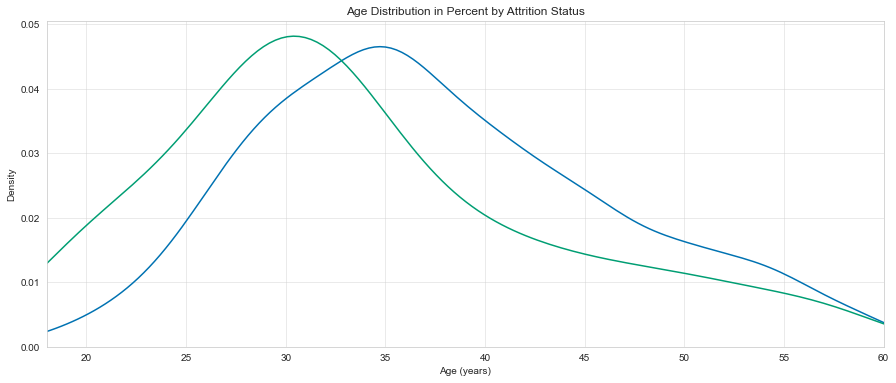

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

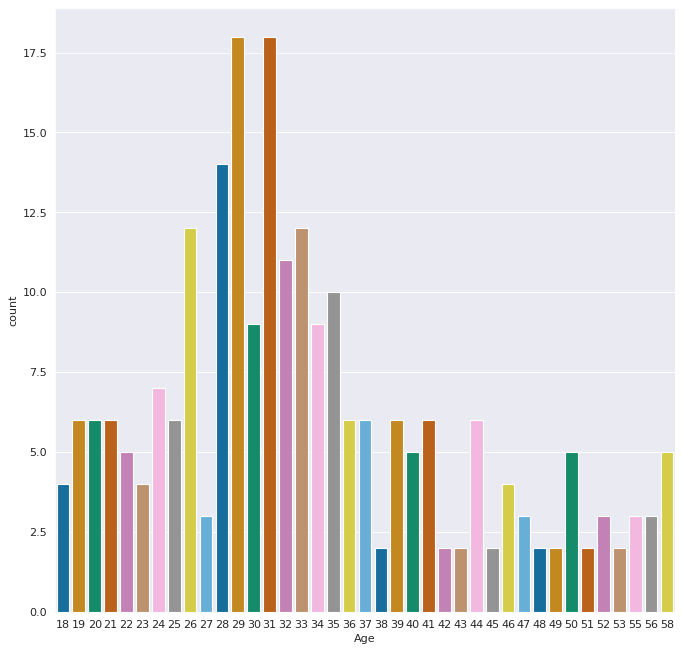

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='Age',data=attrited_df,palette='colorblind')

plt.xlabel('Age')
plt.show()

Больше всего людей уходило в возрасте от 26 до 35(достаточно молодые специалисты)

### 5) JobRole

In [ ]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

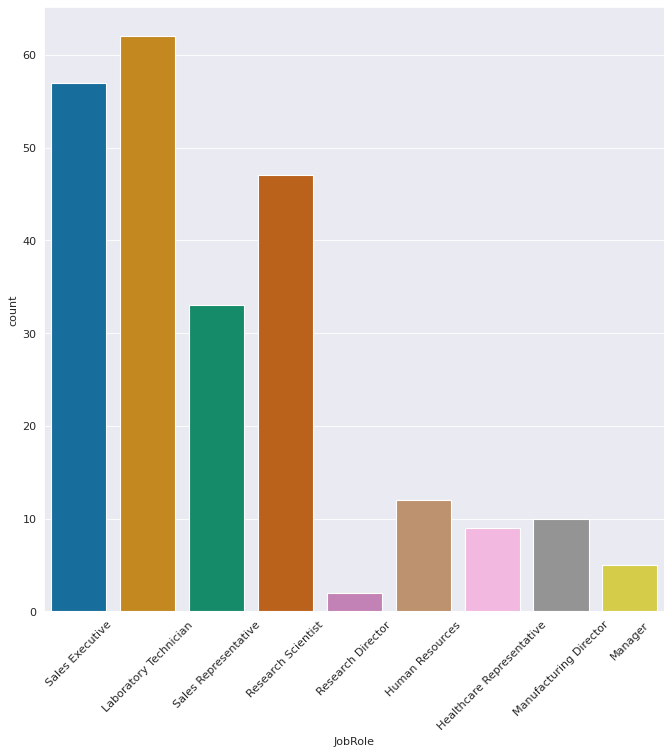

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='JobRole',data=attrited_df,palette='colorblind')

plt.xlabel('JobRole')
plt.xticks(rotation=45)
plt.show()

Большинство уволившихся были или техническими лаборантами,или директорами по продажам, или научными исследователями

### 6) DistanceFromHome

In [ ]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


Text(0.5, 1.0, 'Distance From Home Distribution in Percent by Attrition Status')

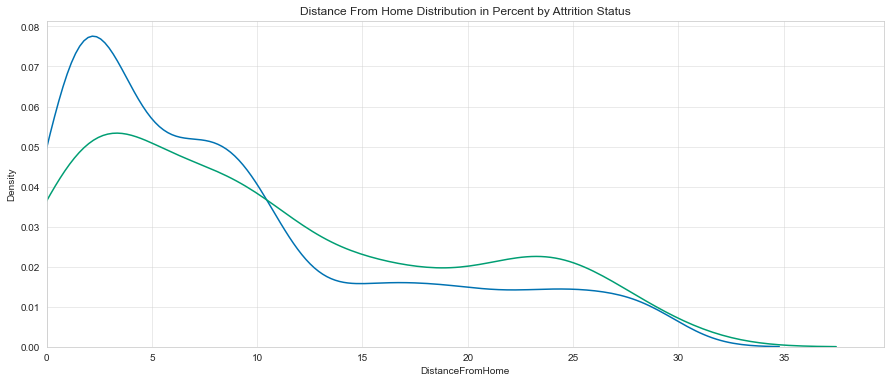

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status')

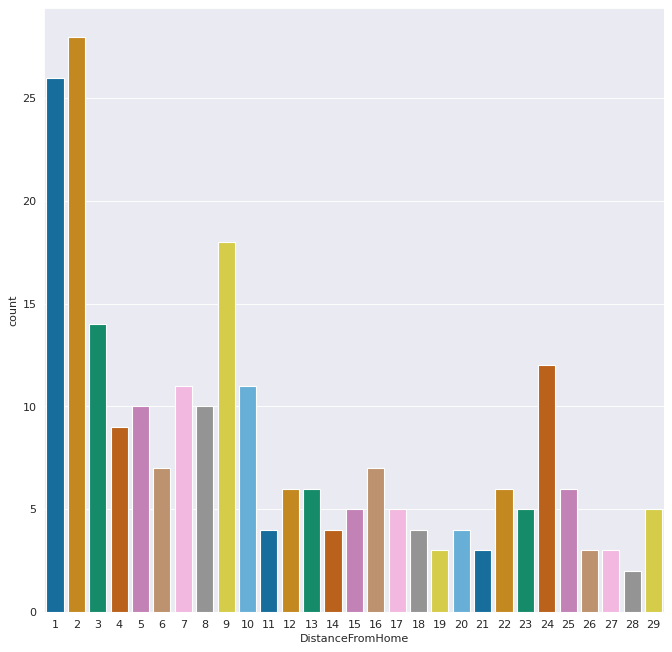

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='DistanceFromHome',data=attrited_df,palette='colorblind')

plt.show()

Большая часть уволившихся жила рядом с работой

### 7) MaritalStatus

In [ ]:
# Marital Status of employees
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

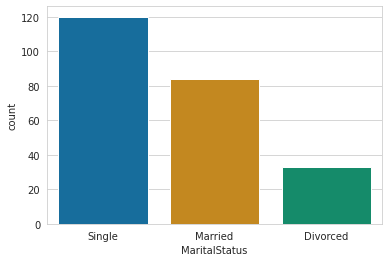

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus',data=attrited_df,palette='colorblind')

plt.show()

большая часть увольвшихся была не жената/не замужем

### 8) RelationshipSatisfaction

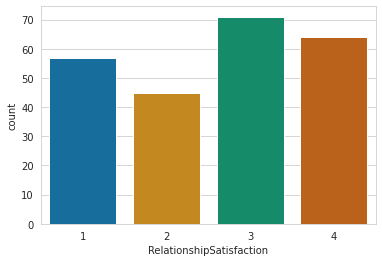

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='RelationshipSatisfaction',data=attrited_df,palette='colorblind')

plt.show()

Много людей не было удовлетворены коллективом

### 9) EnvironmentSatisfaction

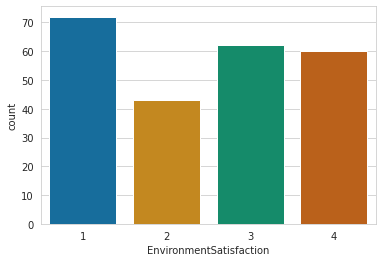

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='EnvironmentSatisfaction',data=attrited_df,palette='colorblind')

plt.show()

Большинству не нравилась обстановка на работе

### 10) WorkLifeBalance

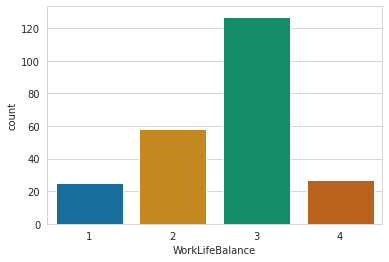

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='WorkLifeBalance',data=attrited_df,palette='colorblind')

plt.show()

Большинство имело хороший баланс между личной жизнью и работой

### 11) YearsAtCompany

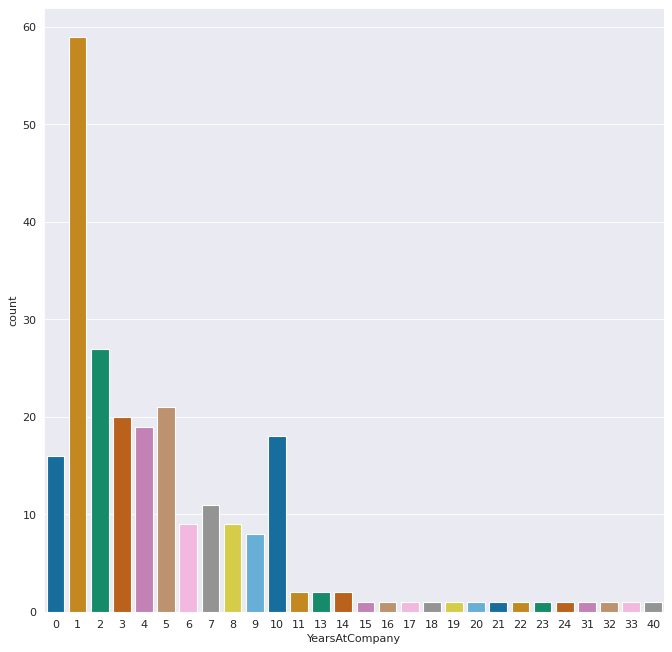

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='YearsAtCompany',data=attrited_df,palette='colorblind')

plt.show()

Большинство не проводило и двух лет в компании 

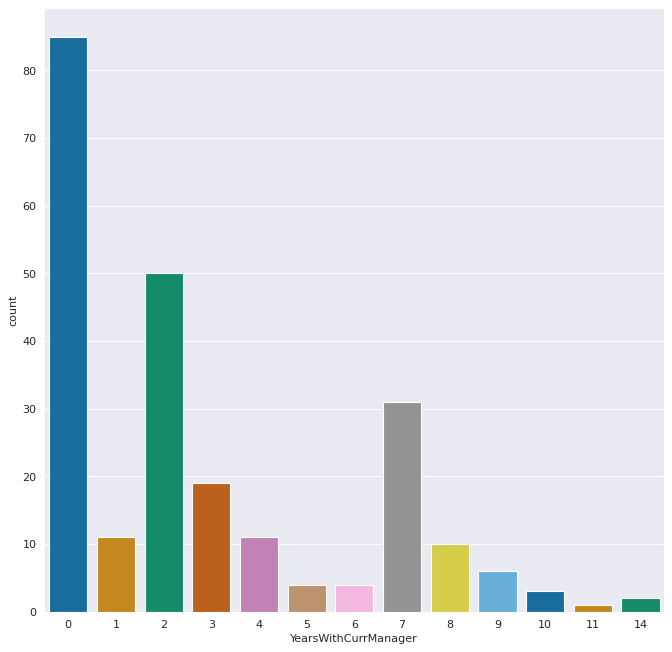

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='YearsWithCurrManager',data=attrited_df,palette='colorblind')

plt.show()

Большинство и года не пробыло с текущим менеджером

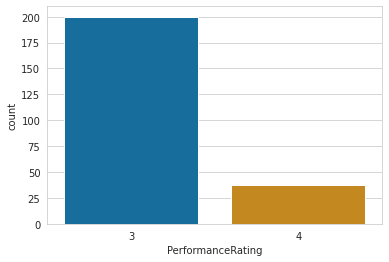

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='PerformanceRating',data=attrited_df,palette='colorblind')

plt.show()

Все уволившиеся отлично справлялись с работой


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


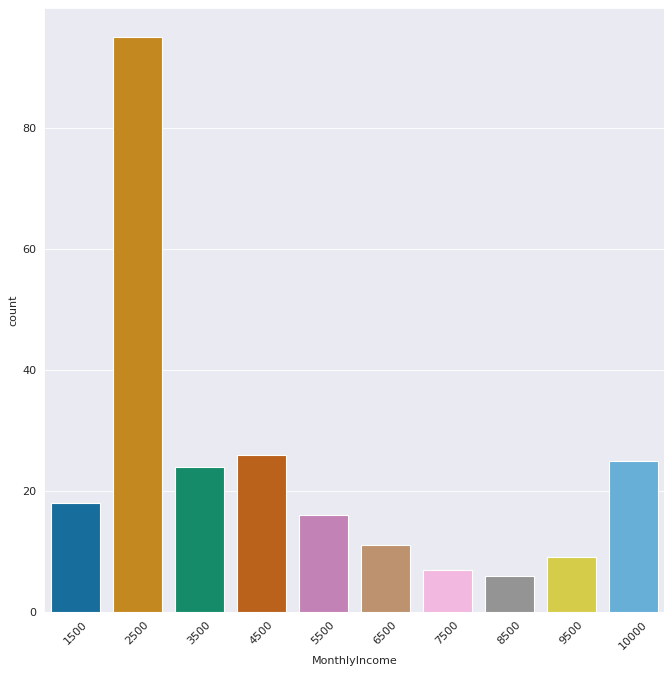

In [ ]:
for line in df['MonthlyIncome']:
  
    if line >= 2000 and line < 3000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 2500
    elif line >= 3000 and line < 4000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 3500
    elif line >= 4000 and line < 5000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 4500
    elif line >= 5000 and line < 6000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 5500
    elif line >= 6000 and line < 7000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 6500
    elif line >= 7000 and line < 8000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 7500
    elif line >= 8000 and line < 9000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 8500
    elif line >= 9000 and line < 10000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 9500
    elif line >= 10000:
    attrited_df.loc[(df.MonthlyIncome == line), 'MonthlyIncome' ] = 10000


sns.set_style('darkgrid')
plt.figure(figsize=(10,10),dpi=80)
sns.countplot(x='MonthlyIncome',data=attrited_df,palette='colorblind')
plt.xticks(rotation=45)
plt.show()

большая часть зарабатывала от 2000 до 3000 

ВЫВОД:

Большинство уволившихся в возрасте от 26 до 35 не проработали больше двух лет в компании, а с текущим менеджером и года. У большинства также наблюдается неприязнь к окружающей рабочей обстановке, а также проблема с взаимоотношениями в коллективе. Также многие уволившиеся были или техническими лаборантами или научными исследователями, т.е. были в одном департаменте исследований и разработки и получали достаточно низкую зарплату от 2000 до 3000. У подавляющего числа уволившихся дистанция от дома до работы маленькая, баланс между жизнью и работой хороший




**                                      ПРЕДПРОЦЕССИНГ                                 **

In [3]:
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Заполнение пропущенных значений
df.fillna(0)
df.shape

(1470, 35)

In [5]:
#Замена значений в столбце Attririon
df.loc[df.Attrition == 'Yes', 'Attrition'] = 1
df.loc[df.Attrition == 'No', 'Attrition'] = 0
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#Encoding
la_count = 0
la = preprocessing.LabelEncoder()
for col in df.columns[2:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            la.fit(df[col])
            df[col] = la.transform(df[col])
            la_count += 1
print('{} columns were label encoded.'.format(la_count))

# convert rest of categorical variable into dummy
df= pd.get_dummies(df, drop_first=True)

0 columns were label encoded.


In [16]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [17]:
#Сохранение значений Attrition
att = df.loc[:, 'Attrition_1']
att

KeyError: ignored

In [18]:
#Создание DataFrame без "Attrition"
df_no_att = df
df_no_att.pop('Attrition_1')
df_no_att.head()

KeyError: ignored

In [10]:
#Scaling
scale = preprocessing.MinMaxScaler(feature_range=(0,5))
for col in df_no_att.columns:
  df_no_att[col] = df_no_att[col].astype('float')
  df_no_att[[col]] = scale.fit_transform(df_no_att[[col]])
df_no_att.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [11]:
#Разбивка на test и train выборки
X_train, X_test, y_train, y_test = train_test_split(df_no_att, att, test_size=0.25, random_state=42, stratify=att)

           Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
22    1.904762   1.134574          1.071429       3.75            0.0   
74    2.142857   0.107373          0.892857       2.50            0.0   
1339  0.476190   1.034359          1.071429       0.00            0.0   
251   2.500000   1.442377          0.178571       3.75            0.0   
1182  2.142857   2.834646          0.000000       3.75            0.0   
...        ...        ...               ...        ...            ...   
365   3.333333   3.729420          1.071429       3.75            0.0   
963   2.380952   3.246242          0.178571       1.25            0.0   
734   0.476190   0.411596          1.250000       0.00            0.0   
1315  2.142857   1.173944          0.178571       3.75            0.0   
1292  2.500000   2.376521          3.392857       2.50            0.0   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
22          0.065312                 0.000000     0.0 

**Метод опорных векторов**

In [12]:
#Обучение через метод опорных векторов
SVM_classifier = SVC()
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000], 
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ['rbf']} 
grid = GridSearchCV(SVM_classifier, param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

NameError: ignored

In [ ]:
#Лучший параметр
best_svm = grid.best_estimator_
print(best_svm)

In [ ]:
y_pred_svm = best_svm.predict(X_test)
  
# classification report
print(classification_report(y_test, y_pred_svm))

In [ ]:
#Confusion matrix
confusion_matrix(y_test, y_pred_svm)

In [ ]:
plot_confusion_matrix(grid, X_test, y_test )

In [ ]:
#ROC-кривая
fprs, tprs, thr = metrics.roc_curve(y_test, y_pred_svm)
plt.plot(fprs, tprs, marker='o')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC_curve')

In [ ]:
metrics.auc(fprs, tprs)

Feature Importance для метода опорных векторов


In [ ]:
#Feature Importance
model = SVC(kernel='rbf', C=10, gamma=0.001)
model.fit(X_train, y_train)
explainer = shap.KernelExplainer(model.predict, X_train[:100], link='identity')
sum_plot = explainer.shap_values(X_train)
shap.summary_plot(sum_plot, X_train)

In [ ]:
#Feature Importance с более маленьким срезом данных
model = SVC(kernel='rbf', C=10, gamma=0.001)
X_train_50 = X_train.iloc[:50]
y_train_50 = y_train.iloc[:50]
model.fit(X_train_50, y_train_50)
explainer = shap.KernelExplainer(model.predict, X_train_50, link='identity')
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
sum_plot = explainer.shap_values(X_train_50)
shap.summary_plot(sum_plot, X_train_50)

In [ ]:
# perform permutation importance
results = permutation_importance(grid, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
col = X_test.columns
k = 0
for i, v in enumerate(importance):
    print(col[k], '->', sep='', end=' ')
    print('Score: %.5f' % v)
    k+=1
# plot feature importance
plt.figure(figsize=(10, 10))
plt.xticks(rotation = 90)
plt.bar([x for x in col], importance)
plt.show()

**Решающие деревья**

In [ ]:
#Решающие деревья
dtreeClf = DecisionTreeClassifier()
pipe = Pipeline([("GS_CV_tree", dtreeClf)])
parameters_tree = [{'GS_CV_tree__criterion' : ['entropy'], 
                    'GS_CV_tree__max_depth' : [2, 4, 6, 8, 10], 
                    'GS_CV_tree__splitter': ['best'], 
                    'GS_CV_tree__max_features': ['sqrt'], 
                    'GS_CV_tree__min_samples_leaf': [1], 
                    'GS_CV_tree__min_samples_split':[2]}]
grid_search = GridSearchCV(pipe, param_grid=parameters_tree, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

In [ ]:
#Лучший параметр
best_tree = grid_search.best_estimator_

In [ ]:
y_pred_tree = best_tree.predict(X_test)
  
# classification report
print(classification_report(y_test, y_pred_tree))

In [ ]:
#Confusion matrix
confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(grid_search, X_test, y_test )

In [ ]:
#ROC-кривая
fprs, tprs, thr = metrics.roc_curve(y_test, y_pred_tree)
plt.plot(fprs, tprs, marker='o')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC_curve')

In [ ]:
metrics.auc(fprs, tprs)

**Логическая регрессия**

In [ ]:
#Обучение модели
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=7)
grid = GridSearchCV(model, return_train_score=True, param_grid={'C': np.arange(1e-03, 2, 0.01)}, scoring='roc_auc', cv=10)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
#Лучший параметр
best_reg = grid.best_estimator_
best_reg

In [ ]:
y_reg = best_reg.predict(X_test)

print(classification_report(y_test,y_reg))

In [ ]:
#Confusion матрица
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_reg)
plot_confusion_matrix(grid, X_test, y_test )

In [ ]:
#ROC-кривая 
from sklearn.metrics import roc_curve, auc


fprs, tprs, thr = roc_curve(y_test, y_reg)
roc_auc = auc(fprs, tprs)
plt.plot(fprs, tprs, color='darkorange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
#Метрика логической регрессии
roc_auc = auc(fprs, tprs)
roc_auc

 `У логической регрессии метрика выше, поэтому выбираем её`

Feature importance для логической регрессии


In [ ]:
#feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(grid, X_test, y_test, scoring='accuracy')
importance = results.importances_mean
col = X_test.columns
k = 0
for i, v in enumerate(importance):
    print(col[k], '->', sep='', end=' ')
    print('Score: %.5f' % v)
    k+=1
plt.figure(figsize=(30, 20))
plt.xticks(rotation = 60)
plt.bar([x for x in col], importance)

plt.show()

In [ ]:
model.fit(X_train, y_train)
explainer = shap.KernelExplainer(model.predict, X_train[:100], link='identity')
sum_plot = explainer.shap_values(X_train)
shap.summary_plot(sum_plot, X_train)

In [ ]:
X_train_50 = X_train.iloc[:50]
y_train_50 = y_train.iloc[:50]
model.fit(X_train_50, y_train_50)
explainer = shap.KernelExplainer(model.predict, X_train_50, link='identity')
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
expected_value

In [ ]:
select = range(50)
features = X_test.iloc[select]
shap_values = explainer.shap_values(features)[1] 
features_display = X_test.loc[features.index]

In [ ]:
shap.decision_plot(expected_value, shap_values, features_display)

In [ ]:
shap.decision_plot(expected_value, shap_values, features_display, link='logit') #with probabilities

# Анализ диаграммы Feature Importance
На этой диаграмме ось x обозначает значение shap_value, а ось y содержит features. Каждая точка на графике представляет собой одно shap_value для прогноза и feature. Малиновый цвет означает более высокий показатель feature, а синий - более низкий. На основе этой диаграммы можно получить общее представление о влиянии features на прогноз модели на основе распределения малиновых и синих точек.
Судя по диаграмме, сильнее всего на решение людей уволиться согласно модели влияют: высокие переработки; частые командировки; большое число компаний, в которых работал человек; работа в отделе "Sales Representative", а также низкое вовлечение в рабочий процесс и низкое удовлетворение от работы и обстановки.